# Data Exploration

In [73]:
import pandas as pd

df = pd.read_csv(r"..\data\raw\nutritional-facts.csv")
df.head()

,Food Name,Category Name,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,...,Vitamin D,Vitamin E,Vitamin K,Omega-3 - ALA,Omega-6 - Eicosadienoic acid,Omega-6 - Gamma-linoleic acid,Omega-3 - Eicosatrienoic acid,Omega-6 - Dihomo-gamma-linoleic acid,Omega-6 - Linoleic acid,Omega-6 - Arachidonic acid
0,Apple,Fruits,0.006,52.0,14.0,0.0,0.00003,0.17,2.4,0.000003,...,0.0,0.00018,2.200000e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apricot,Fruits,0.013,48.0,11.0,0.0,0.00008,0.39,2.0,0.000009,...,0.0,0.00089,3.300000e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dried fruit,Fruits,0.055,241.0,63.0,0.0,0.00034,0.51,7.3,0.000010,...,0.0,0.00430,3.100000e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Avocado,Fruits,0.012,160.0,8.5,0.0,0.00019,15.00,6.7,0.000081,...,0.0,0.00210,2.100000e-05,0.11,0.0,0.02,NaN,NaN,NaN,NaN
4,Banana,Fruits,0.005,89.0,23.0,0.0,0.00008,0.33,2.6,0.000020,...,0.0,0.00010,5.000000e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
categories = df["Category Name"].unique()
print("This dataset contains", len(categories), "categories of food.\nThey are:", categories)

This dataset contains 25 categories of food.
They are: ['Fruits' 'Vegetables' 'Seafood' 'Lactose-Free Dairy' 'Dairy' 'Eggs'
 'Mushrooms' 'Grains' 'Legumes' 'Gluten-Free Grains' 'White Meat'
 'Cured Meat' 'Red Meat' 'Spices' 'Oils and Sauces' 'Nuts' 'Greens'
 'Sweets' 'Beverages' 'Soups' 'Baked Products'
 'Gluten-Free Baked Products' 'Fast Foods'
 'Meals, Entrees, and Side Dishes' 'Baby Foods']


Fruits, Vegetables and Greens will depend on seasonality of products, in this case, in Italy. Dairy and Lactose-free Dairy belong to the very same category but they are divided in two subsets. The same happened with Grains and Gluten-free Grains but also with White Meat, Red Meat and Cured Meat. Spices are not very useful at this moment. Oils and Sauces are important to cook everything and should follow the user's habits. Sweets, Beverages, Soup, Fast Foods, Meals, Entrees and Side Dishes and Baby Foods should not be considered. Removing all the unnecessary categories, we will get something like this:

In [75]:
print("The dataset contains", len(df), "rows.")
categories_to_drop = ["Sweets", "Soups", "Spices", "Fast Foods", "Meals, Entrees, and Side Dishes", "Baby Foods"]
df = df[~df["Category Name"].isin(categories_to_drop)]
print("After dropping the categories, the dataset contains", len(df), "rows.")

The dataset contains 649 rows.
After dropping the categories, the dataset contains 305 rows.


In [76]:
print("Columns:", df.columns)

Columns: Index(['Food Name', 'Category Name', 'Calcium', 'Calories', 'Carbs',
       'Cholesterol', 'Copper', 'Fats', 'Fiber', 'Folate', 'Iron', 'Magnesium',
       'Monounsaturated Fat', 'Net carbs', 'Omega-3 - DHA', 'Omega-3 - DPA',
       'Omega-3 - EPA', 'Phosphorus', 'Polyunsaturated fat', 'Potassium',
       'Protein', 'Saturated Fat', 'Selenium', 'Sodium', 'Trans Fat',
       'Vitamin A (IU)', 'Vitamin A RAE', 'Vitamin B1', 'Vitamin B12',
       'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C',
       'Zinc', 'Choline', 'Fructose', 'Histidine', 'Isoleucine', 'Leucine',
       'Lysine', 'Manganese', 'Methionine', 'Phenylalanine', 'Starch', 'Sugar',
       'Threonine', 'Tryptophan', 'Valine', 'Vitamin D', 'Vitamin E',
       'Vitamin K', 'Omega-3 - ALA', 'Omega-6 - Eicosadienoic acid',
       'Omega-6 - Gamma-linoleic acid', 'Omega-3 - Eicosatrienoic acid',
       'Omega-6 - Dihomo-gamma-linoleic acid', 'Omega-6 - Linoleic acid',
       'Omega-6 - Arachidonic ac

When we have to suggest a similar food, it should be better if we consider only Calories, Carbs, Fats, Fiber, Net Carbs, Protein, Saturated Fat.

In [77]:
nutrient_columns = ["Calories", "Carbs", "Fats", "Fiber", "Net carbs", "Protein"]

In [78]:
# Print every row that has Oil and Sauces in the category name
print(df[df["Category Name"] == "Oils and Sauces"][["Food Name"] + nutrient_columns])

          Food Name  Calories  Carbs    Fats  Fiber  Net carbs  Protein
251         Mustard      60.0   5.80    3.30    4.0       1.80     3.70
261      Mayonnaise     680.0   0.57   75.00    0.0       0.57     0.96
385     Soybean oil     884.0   0.00  100.00    0.0       0.00     0.00
386      Peanut oil     884.0   0.00  100.00    0.0       0.00     0.00
387     Coconut oil     892.0   0.00   99.00    0.0       0.00     0.00
388       Olive oil     884.0   0.00  100.00    0.0       0.00     0.00
389        Palm oil     884.0   0.00  100.00    0.0       0.00     0.00
390      Sesame oil     884.0   0.00  100.00    0.0       0.00     0.00
391   Sunflower oil     884.0   0.00  100.00    0.0       0.00     0.00
392       Margarine     717.0   0.70   81.00    0.0       0.70     0.16
393  Barbecue sauce     172.0  41.00    0.63    0.9      40.00     0.82
394           Salsa      36.0   7.00    0.20    1.4       5.60     1.50
395  Marinara sauce      51.0   8.10    1.50    1.8       6.30  

In an Italian household you will for sure find Olive oil, Tomato paste, Tomato sauce, Olives, Mustard, Mayonnese and Ketchup, so we can remove all the other ones.

In [79]:
# Print every row that has Baked Products in the category name
print(df[df["Category Name"] == "Baked Products"][["Food Name"] + nutrient_columns])

            Food Name  Calories  Carbs  Fats  Fiber  Net carbs  Protein
491           Biscuit     353.0   45.0  16.0    1.5       43.0      7.0
493         Egg bread     287.0   48.0   6.0    2.3       46.0      9.5
494      French bread     319.0   62.0   2.1    3.1       59.0     13.0
495     Italian bread     271.0   50.0   3.5    3.2       47.0      8.8
496  Multigrain bread     288.0   47.0   4.6    8.1       39.0     15.0
499        Pita bread     275.0   56.0   1.2    2.2       54.0      9.1
500      Raisin bread     274.0   52.0   4.4    4.3       48.0      7.9
501         Rye bread     259.0   48.0   3.3    5.8       43.0      8.5
502       White Bread     266.0   49.0   3.3    2.7       47.0      8.9
503      Bread crumbs     395.0   72.0   5.3    4.5       67.0     13.0
504      Bread sticks     412.0   68.0   9.5    3.0       65.0     12.0
505    Graham cracker     430.0   78.0  11.0    3.4       74.0      6.7
506           Cracker     510.0   61.0  26.0    2.3       59.0  

In [80]:
# Print every row that has Lactose-Free Dairy in the category name
print(df[df["Category Name"] == "Lactose-Free Dairy"][["Food Name"] + nutrient_columns])

               Food Name  Calories  Carbs   Fats  Fiber  Net carbs  Protein
113          Blue cheese     353.0   2.30  29.00    0.0       2.30     21.0
114                 Brie     334.0   0.45  28.00    0.0       0.45     21.0
115            Camembert     300.0   0.46  24.00    0.0       0.46     20.0
119                 Edam     357.0   1.40  28.00    0.0       1.40     25.0
120                 Feta     264.0   4.10  21.00    0.0       4.10     14.0
121              Fontina     389.0   1.60  31.00    0.0       1.60     26.0
123         Gouda cheese     356.0   2.20  27.00    0.0       2.20     25.0
124       Gruyere cheese     413.0   0.36  32.00    0.0       0.36     30.0
125            Limburger     327.0   0.49  27.00    0.0       0.49     20.0
126        Monterey Jack     373.0   0.68  30.00    0.0       0.68     24.0
127      Muenster cheese     368.0   1.10  30.00    0.0       1.10     23.0
129           Port Salut     352.0   0.57  28.00    0.0       0.57     24.0
130         

In [81]:
# Print every row that has Dairy in the category name
print(df[df["Category Name"] == "Dairy"][["Food Name"] + nutrient_columns])

             Food Name  Calories  Carbs   Fats  Fiber  Net carbs  Protein
116             Cheese     404.0   3.10  33.00    0.0       3.10    23.00
117     Cottage cheese      98.0   3.40   4.30    0.0       3.40    11.00
118       Cream cheese     350.0   5.50  34.00    0.0       5.50     6.20
122            Brunost     466.0  43.00  30.00    0.0      43.00     9.70
128  Neufchâtel cheese     253.0   3.60  23.00    0.0       3.60     9.20
131            Ricotta     174.0   3.00  13.00    0.0       3.00    11.00
133          Roquefort     369.0   2.00  31.00    0.0       2.00    22.00
136      Whipped cream     257.0  12.00  22.00    0.0      12.00     3.20
137               Milk      42.0   5.00   0.97    0.0       5.00     3.40
138          Goat milk      69.0   4.50   4.10    0.0       4.50     3.60
142             Butter     717.0   0.06  81.00    0.0       0.06     0.85
143        Goat cheese     364.0   0.12  30.00    0.0       0.12    22.00
145             Yogurt      59.0   3.6

In [82]:
# Print every row that has Cured Meat in the category name
print(df[df["Category Name"] == "Cured Meat"][["Food Name"] + nutrient_columns])

           Food Name  Calories  Carbs  Fats  Fiber  Net carbs  Protein
191       Turkey ham     118.0   3.10   4.0    0.0       3.10     16.0
192        Bockwurst     301.0   3.00  26.0    1.0       2.00     14.0
193  Bologna sausage     247.0   0.73  20.0    0.0       0.73     15.0
194       Knackwurst     307.0   3.20  28.0    0.0       3.20     11.0
196    Luncheon meat     189.0   1.00  13.0    0.0       1.00     18.0
197       Mortadella     311.0   3.10  25.0    0.0       3.10     16.0
198        Pepperoni     504.0   1.20  46.0    0.0       1.20     19.0
199           Salami     336.0   2.40  26.0    0.0       2.40     22.0
200   Vienna sausage     230.0   2.60  19.0    0.0       2.60     11.0
201  Italian sausage     344.0   4.30  27.0    0.1       4.20     19.0
202     Turkey bacon     226.0   1.90  17.0    NaN       1.90     16.0
203   Turkey sausage     235.0   1.60  18.0    0.0       1.60     15.0
204        Bratwurst     297.0   2.00  26.0    0.0       2.00     12.0
208   

In [83]:
oils_and_sauces_it = ["Mustard", "Mayonnaise", "Olive Oil", "Tomato sauce", "Ketchup"]
baked_products_it = ["Italian bread", "Focaccia", "Bread sticks", "Bread crumbs", "French bread", "White bread"]
lacotse_free_dairy_it = ["Parmigiano-Reggiano", "Provolone", "Feta", "Greek yogurt", "Kefir"]
dairy_it = ["Mozzarella", "Ricotta", "Butter", "Milk", "Yogurt", "Cream cheese"]
cured_meat_it = ["Mortadella", "Salami", "Italian sausage", "Ham", "Turkey ham", "Turkey sausage"]

In [84]:
# Fill NaN values with 0
df.fillna(0, inplace=True)

In [85]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity matrix for the nutrient columns
cosine_similarity_matrix = cosine_similarity(df[nutrient_columns].fillna(0))
cosine_similarity_df = pd.DataFrame(cosine_similarity_matrix, index=df["Food Name"], columns=df["Food Name"])

# Get the cosine similarity values for Milk
milk_similarity = cosine_similarity_df.loc["Milk"]

# Sort the values in descending order and get the top 3 similar foods (excluding Milk itself)
top_3_similar_to_milk = milk_similarity.sort_values(ascending=False).index[1:4]
print("Top 3 foods similar to Milk:", top_3_similar_to_milk.tolist())

Top 3 foods similar to Milk: ['Kefir', 'Soy milk', 'Soy yogurt']


Let's define some rules for suggestions.

### Dairy

Dairy is rich in calcium, protein, and Vitamin D. Alternatives include:
1. Plant-based dairy substitutes (soy, oat or coconut milk, plant-based yogurts)
2. Other calcium-rich foods (leafy greens, seeds, nuts, tofu)

### Meat

Meat is rich in protein, iron, zinc, and B vitamins (notably B12). Alternatives include:
1. Plant-based protein sources (tofu, tempeh, seitan)
2. Iron-rich plant foods (lentils, chickpeas, kidney beans, black beans)
3. Seafood alternatives (can replace red meat while providing omega-3 fatty acids)

### Legume

Legumes are rich in protein, fiber, and complex carbs. Alternatives include:
1. Nuts and seeds (almonds, walnuts)
2. Soy products (tofu, tempeh)
3. Vegetables with high protein/fiber content (green peas, artichoke, broccoli)

### Cross-Functional Equivalents

For a more balanced substitution:
- Eggs are equivalent to both meat and dairy for protein
- Whole grains can complement legumes to provide complete proteins

In [86]:
# Filter the cosine similarity values for Milk
dairy_similarity = cosine_similarity_df.loc["Milk"]

# Sort the values in descending order
sorted_similarity = dairy_similarity.sort_values(ascending=False)

# Get the first dairy product different from the searched one
first_dairy = sorted_similarity[sorted_similarity.index.isin(dairy_it) & (sorted_similarity.index != "Milk")].index[0]

# Get the first lactose-free dairy product
first_lactose_free_dairy = sorted_similarity[sorted_similarity.index.isin(lacotse_free_dairy_it)].index[0]

# Print the top 3 suggestions
top_3_suggestions = [first_dairy, first_lactose_free_dairy]
print("Top 3 suggestions for Milk:", top_3_suggestions)

Top 3 suggestions for Milk: ['Yogurt', 'Kefir']


In [87]:
# Filter the cosine similarity values for Milk
meat_similarity = cosine_similarity_df.loc["Milk"]

# Sort the values in descending order
sorted_similarity = meat_similarity.sort_values(ascending=False)

# Get the first dairy product different from the searched one
first_red_meat = sorted_similarity[sorted_similarity.index.isin(dairy_it) & (sorted_similarity.index != "Milk")].index[0]

# Get the first lactose-free dairy product
first_lactose_free_dairy = sorted_similarity[sorted_similarity.index.isin(lacotse_free_dairy_it)].index[0]

# Print the top 3 suggestions
top_3_suggestions = [first_dairy, first_lactose_free_dairy]
print("Top 3 suggestions for Milk:", top_3_suggestions)

Top 3 suggestions for Milk: ['Yogurt', 'Kefir']


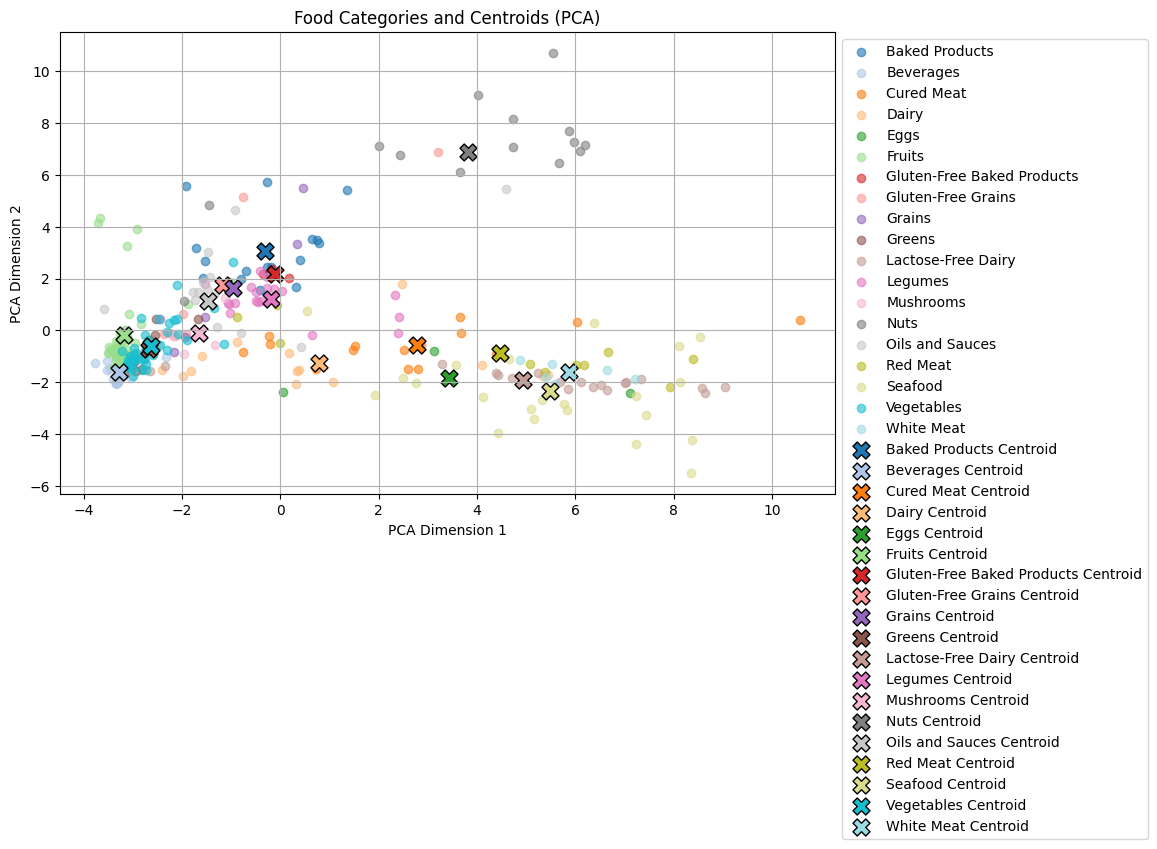

In [89]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import numpy as np

# Assuming `X` is df without "Food Name" and "Category Name"
X = df.drop(columns=["Food Name", "Category Name"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

centroids = df.drop(columns=["Food Name"]).groupby("Category Name").mean()

# Perform PCA for dimensionality reduction to 2D if needed
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
centroids_reduced = pca.transform(scaler.transform(centroids))

# Generate a colormap with as many unique colors as there are categories
categories = centroids.index
colors = cm.tab20(np.linspace(0, 1, len(categories)))  # Use `tab20` for a wide range of colors
category_colors = {category: color for category, color in zip(categories, colors)}

plt.figure(figsize=(10, 6))

# Define the variable `y` as the "Category Name" column
y = df["Category Name"].values

# Plot the data points
for category in categories:
    indices = (y == category)
    plt.scatter(
        X_reduced[indices, 0],
        X_reduced[indices, 1],
        label=category,
        alpha=0.6,
        color=category_colors[category]
    )

# Plot centroids
for i, category in enumerate(categories):
    plt.scatter(
        centroids_reduced[i, 0],
        centroids_reduced[i, 1],
        label=f"{category} Centroid",
        color=category_colors[category],
        edgecolor='k',
        s=150,
        marker='X'
    )

plt.title("Food Categories and Centroids (PCA)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside plot
plt.grid(True)
plt.show()
